#Advanced Deep Learning (2022- 2023)
##Assignment-1

Student: Ufuk Cem Birbiri

In [1]:
import torch
import torchvision  #To be able to access standard datasets more easily
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np  # To plot and display stuff
import torch.optim as optim # Where the optimization modules are
%matplotlib inline

# Using torchvision we can conveniently load some datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Extract tensor of data and labels for both the training and the test set
x, y = trainset.data.float(), trainset.targets
x_test, y_test = testset.data.float(), testset.targets
x.shape, y.shape, x_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

Let's see how many classes we have:

In [3]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Q1

Try to load the same data directly from the "MINST database" website http://yann.lecun.com/exdb/mnist/
Be careful that the images can have a different normalization and encoding

### Answer.1

This question was a lot bit tricky. I found a good code that can load the same data directly from the "MINST database" website. In the next cell, there is the code.

In [9]:
import os
import requests
import gzip
def load_mnist(train_data=True, test_data=False):
    """
    Get mnist data from the official website and
    load them in binary format.

    Parameters
    ----------
    train_data : bool
        Loads
        'train-images-idx3-ubyte.gz'
        'train-labels-idx1-ubyte.gz'
    test_data : bool
        Loads
        't10k-images-idx3-ubyte.gz'
        't10k-labels-idx1-ubyte.gz' 

    Return
    ------
    tuple
    tuple[0] are images (train & test)
    tuple[1] are labels (train & test)
    """
    RESOURCES = [
        'train-images-idx3-ubyte.gz',
        'train-labels-idx1-ubyte.gz',
        't10k-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz']

    if (os.path.isdir('data') == 0):
        os.mkdir('data')
    if (os.path.isdir('data/mnist') == 0):
        os.mkdir('data/mnist')
    for name in RESOURCES:
        if (os.path.isfile('data/mnist/'+name) == 0):
            url = 'http://yann.lecun.com/exdb/mnist/'+name
            r = requests.get(url, allow_redirects=True)
            open('data/mnist/'+name, 'wb').write(r.content)

    return get_images(train_data, test_data), get_labels(train_data, test_data)


def get_images(train_data=True, test_data=False):

    to_return = []

    if train_data:
        with gzip.open('data/mnist/train-images-idx3-ubyte.gz', 'r') as f:
            # first 4 bytes is a magic number
            magic_number = int.from_bytes(f.read(4), 'big')
            # second 4 bytes is the number of images
            image_count = int.from_bytes(f.read(4), 'big')
            # third 4 bytes is the row count
            row_count = int.from_bytes(f.read(4), 'big')
# fourth 4 bytes is the column count
            column_count = int.from_bytes(f.read(4), 'big')
            # rest is the image pixel data, each pixel is stored as an unsigned byte
            # pixel values are 0 to 255
            image_data = f.read()
            train_images = np.frombuffer(image_data, dtype=np.uint8)\
                .reshape((image_count, row_count, column_count))
            to_return.append(np.where(train_images > 127, 1, 0))

    if test_data:
        with gzip.open('data/mnist/t10k-images-idx3-ubyte.gz', 'r') as f:
            # first 4 bytes is a magic number
            magic_number = int.from_bytes(f.read(4), 'big')
            # second 4 bytes is the number of images
            image_count = int.from_bytes(f.read(4), 'big')
            # third 4 bytes is the row count
            row_count = int.from_bytes(f.read(4), 'big')
            # fourth 4 bytes is the column count
            column_count = int.from_bytes(f.read(4), 'big')
            # rest is the image pixel data, each pixel is stored as an unsigned byte
            # pixel values are 0 to 255
            image_data = f.read()
            test_images = np.frombuffer(image_data, dtype=np.uint8)\
                .reshape((image_count, row_count, column_count))
            to_return.append(np.where(test_images > 127, 1, 0))

    return to_return


def get_labels(train_data=True, test_data=False):
    to_return = []

    if train_data:
        with gzip.open('data/mnist/train-labels-idx1-ubyte.gz', 'r') as f:
            # first 4 bytes is a magic number
            magic_number = int.from_bytes(f.read(4), 'big')
            # second 4 bytes is the number of labels
            label_count = int.from_bytes(f.read(4), 'big')
            # rest is the label data, each label is stored as unsigned byte
            # label values are 0 to 9
            label_data = f.read()
            train_labels = np.frombuffer(label_data, dtype=np.uint8)
            to_return.append(train_labels)
    if test_data:
        with gzip.open('data/mnist/t10k-labels-idx1-ubyte.gz', 'r') as f:
            # first 4 bytes is a magic number
            magic_number = int.from_bytes(f.read(4), 'big')
            # second 4 bytes is the number of labels
            label_count = int.from_bytes(f.read(4), 'big')
            # rest is the label data, each label is stored as unsigned byte
            # label values are 0 to 9
            label_data = f.read()
            test_labels = np.frombuffer(label_data, dtype=np.uint8)
            to_return.append(test_labels)

    return to_return

Let's load the data:

In [25]:
import numpy as np
x = load_mnist(train_data=True, test_data=True)


In [32]:
x[0][0].shape, x[0][1].shape, x[1][0].shape, x[1][1].shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [33]:
x_train2= x[0][0] #shape = (60000, 28, 28)
x_test2 = x[0][1] #shape = (10000,)

y_train2= x[1][0] #shape=(60000,)
y_test2 = x[1][1] #shape = (10000,)


### Q2

In [38]:
# Transform labels to one_hot encoding
y_one_hot = torch.nn.functional.one_hot(y.to(torch.int64), num_classes=10).float()
y_test_one_hot = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=10).float()


In [39]:
y_one_hot.shape, y_test_one_hot.shape

(torch.Size([60000, 10]), torch.Size([10000, 10]))

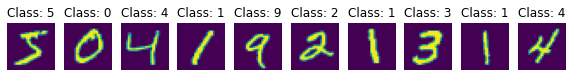

In [7]:
### Q2
# Using the utilities in plt and numpy display some images and check that the corresponding labels are consistent

#Let's visualize the first 10 images in the dataset with their labels to chechk whether their labels are correct or not:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x[i,:,:,].numpy().reshape(28,28)) #, cmap="gray_r")
    plt.title('Class: '+str(y[i].item()))

It seems that their labels are correct.

### Q3

In [8]:

### Q3
# Complete the code below so to have a MLP with one hidden layer with 300 neurons
# Remember that we want one-hot outputs

# Now let us define the neural network we are using
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.Sigmoid(),
    torch.nn.Linear(300, 10),
)


# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

### Q4

In [9]:
### Q4
# Complete the code below to perform a GD based optimization
import torch.nn.functional as F

test_loss= []
train_loss =[]

for k in range(100):
    optimizer.zero_grad()

    inputs = torch.flatten(x, start_dim=1, end_dim=2) #shape=[60000, 784]
    outputs = net(inputs) #shape = [60000, 10]
    
    labels = y_one_hot #shape = [60000, 10]

    #Define the empirical risk
    Risk = loss(outputs, labels )

    #Save the training loss:
    train_loss.append(Risk.item())

    #Save the test loss:
    x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
    y_pred_test = net(x_test_flatten) #shape = [10000, 10]
    Risk_test = loss(y_pred_test, y_test)
    #acc = torch.sum(y_pred_test == y_test_one_hot) / y_test_one_hot.shape[0]
    test_loss.append(Risk_test.item())

    #Make the backward step (1 line instruction)
    Risk.backward()

    #Upadte the parameters (1 line instruction)
    optimizer.step()


    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk.item())


torch.Size([60000, 10])
tensor([[ 0.0880,  0.6203, -0.0571,  ...,  0.3549,  0.4068, -0.1799],
        [-0.1006,  0.3435,  0.2239,  ...,  0.7770,  0.4280, -0.1715],
        [ 0.5397,  0.3198,  0.2909,  ...,  0.2009,  0.1401,  0.1065],
        ...,
        [ 0.2384,  0.3107,  0.1861,  ...,  0.3782,  0.5247, -0.4312],
        [ 0.1147, -0.0525,  0.2870,  ...,  0.4419,  0.5415, -0.1552],
        [-0.0765, -0.1253, -0.0808,  ...,  0.3885,  0.0698,  0.1163]],
       grad_fn=<AddmmBackward0>)


In [24]:
### Q5
# Compute the final accuracy on test set
pred = net(torch.flatten(x_test, start_dim=1, end_dim=2))
pred = pred.detach().numpy()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,np.argmax(pred,axis=1))

print("Final accuracy on test", acc)

Final accuracy on test 0.2073


#Exercise 2.

##Q.2

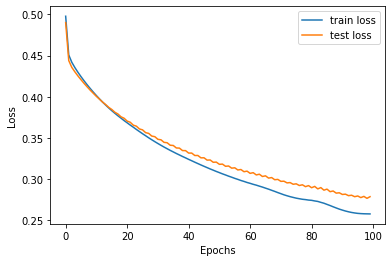

In [16]:
from matplotlib import pyplot as plt
plt.plot(train_loss, label="train loss")
plt.plot(test_loss, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

##Q.3


#### 1. The role of number of neurons (per layer)

Here we will increase the number of neurons in the hidden layer and keep the number of layers fixed.

In [42]:

### Q3
# Complete the code below so to have a MLP with one hidden layer with 300 neurons
# Remember that we want one-hot outputs

# Now let us define the neural network we are using
net2 = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10),

)


# Now we define the optimizer and the loss function
loss2 = torch.nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.1)

In [43]:

# Complete the code below to perform a GD based optimization
import torch.nn.functional as F

test_loss2= []
train_loss2 =[]

for k in range(100):
    optimizer2.zero_grad()

    inputs2 = torch.flatten(x, start_dim=1, end_dim=2) #shape=[60000, 784]
    #print("inputs2", inputs2.shape)
    outputs2 = net2(inputs2) #shape = [60000, 10]
    #print("outputs2", outputs2.shape)
    labels2 = y_one_hot #shape = [60000, 10]
    #print("labels2", labels2.shape)

    #Define the empirical risk
    Risk22 = loss2(outputs2, labels2 )
    #Risk22 = loss2(outputs2.view(-1, outputs2.size(-1)), y.view(-1))
    #Save the training loss:
    train_loss2.append(Risk22.item())

    #Save the test loss:
    x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
    y_pred_test = net2(x_test_flatten) #shape = [10000, 10]
    Risk_test2 = loss2(y_pred_test.view(-1, y_pred_test.size(-1)), y_test.view(-1))
    #acc = torch.sum(y_pred_test == y_test_one_hot) / y_test_one_hot.shape[0]
    test_loss2.append(Risk_test2.item())

    #Make the backward step (1 line instruction)
    Risk22.backward()

    #Upadte the parameters (1 line instruction)
    optimizer2.step()


    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk22.item())




k= 0    Risk =  2.3064544200897217
k= 1    Risk =  2.240551471710205
k= 2    Risk =  2.182539224624634
k= 3    Risk =  2.113914728164673
k= 4    Risk =  2.0364043712615967
k= 5    Risk =  2.0534887313842773
k= 6    Risk =  2.2094221115112305
k= 7    Risk =  1.9368476867675781
k= 8    Risk =  1.8764021396636963
k= 9    Risk =  1.931064486503601
k= 10    Risk =  1.9753222465515137
k= 11    Risk =  1.828948974609375
k= 12    Risk =  1.8851813077926636
k= 13    Risk =  1.7568100690841675
k= 14    Risk =  1.5358612537384033
k= 15    Risk =  1.4650635719299316
k= 16    Risk =  1.497066617012024
k= 17    Risk =  1.7074240446090698
k= 18    Risk =  1.815927267074585
k= 19    Risk =  1.6153647899627686
k= 20    Risk =  1.595772624015808
k= 21    Risk =  1.4518404006958008
k= 22    Risk =  1.3687530755996704
k= 23    Risk =  1.2887427806854248
k= 24    Risk =  1.2281718254089355
k= 25    Risk =  1.094480037689209
k= 26    Risk =  1.0253591537475586
k= 27    Risk =  0.9848793148994446
k= 28    Ri

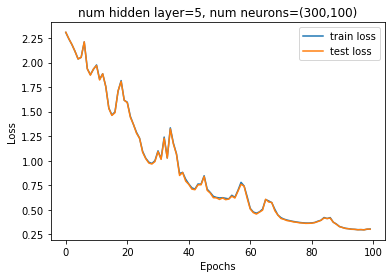

In [44]:
from matplotlib import pyplot as plt
plt.plot(train_loss2, label="train loss")
plt.plot(test_loss2, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("num hidden layer=5, num neurons=(300,100)")
plt.legend()
plt.show()

In [45]:

pred2 = net2(torch.flatten(x_test, start_dim=1, end_dim=2))
pred2 = pred2.detach().numpy()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,np.argmax(pred2,axis=1))

print("Final accuracy on test", acc)

Final accuracy on test 0.9186


In [46]:

pred2_t = net2(torch.flatten(x, start_dim=1, end_dim=2))
pred2_t = pred2_t.detach().numpy()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y,np.argmax(pred2_t,axis=1))

print("Final accuracy on train", acc)

Final accuracy on train 0.9203666666666667
